# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# Deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\ProgramData\Miniconda3\envs\tutorial\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


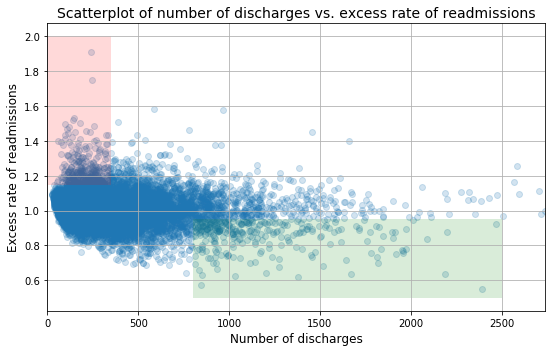

In [4]:
# Generate a scatterplot for number of discharges vs. excess rate of readmissions
# Lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

It's difficult to qualify the analysis and recommendation because the chart is unclear; most of the data points overlap (especially in the 0.8-1.2 area along the y-axis).

Because of this overwhelming cluster in this area, I think it would be clearer to split the hospitals into groups (i.e. small and large hospitals) and then evaluate trends.

As for the claim regarding a significant correlation, there is no quantified analysis or statistical test to substantiate this relationship.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

#### H0: The mean excess readmission ratio is the same for large and small hospitals.

#### H1: The mean excess readmission ration is different for large and small hospitals.


In [6]:
# EDA and Visualization

# Cleaning up data
df = hospital_read_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
# Keep relevant columns
df = df[['Number of Discharges','Excess Readmission Ratio']]

# Drop rows missing Discharge information
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 2 columns):
Number of Discharges        11578 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 271.4 KB


In [9]:
# Check for null values
np.sum(df.isnull())

Number of Discharges         0
Excess Readmission Ratio    81
dtype: int64

In [10]:
# Drop null values
df.dropna(axis=0,how='any',subset=['Excess Readmission Ratio'],inplace=True)

In [11]:
# Split dataset by discharge size
small = df[df['Number of Discharges'] < 100]
large = df[df['Number of Discharges'] >= 100]

In [12]:
print('Large Hospitals')
large['Excess Readmission Ratio'].describe()

Large Hospitals


count    10309.000000
mean         1.005762
std          0.094951
min          0.549500
25%          0.947800
50%          1.000800
75%          1.059200
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

In [13]:
print('Small Hospitals')
small['Excess Readmission Ratio'].describe()

Small Hospitals


count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

In [14]:
# Calculate mean
small_mean = np.mean(small['Excess Readmission Ratio'])
print('Small Hospital ERR Mean: ' + str(small_mean))

large_mean = np.mean(large['Excess Readmission Ratio'])
print('Large Hospital ERR Mean: ' + str(large_mean))

Small Hospital ERR Mean: 1.0226183501683501
Large Hospital ERR Mean: 1.005761994373848


In [15]:
# Visualization

small_err = small['Excess Readmission Ratio']
large_err = large['Excess Readmission Ratio']

s_bins = int(np.sqrt(len(small_err)))
l_bins = int(np.sqrt(len(large_err)))



In [16]:
#Compute ECDFs

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [17]:
# ECDF for Small and Large Hospitals

small_x, small_y = ecdf(small_err)
large_x, large_y = ecdf(large_err)


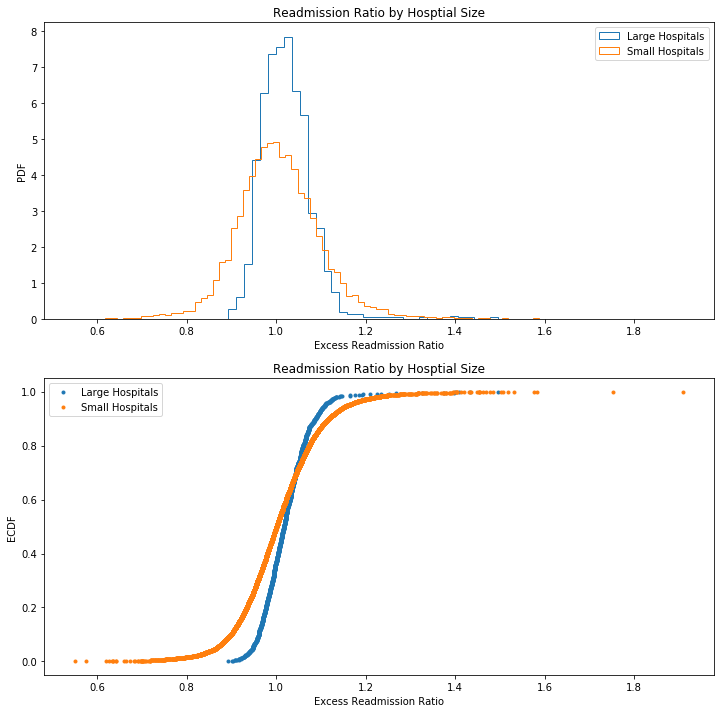

In [18]:
# Plot
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(small_err, bins = s_bins, density=True, histtype='step')
_ = plt.hist(large_err, bins = l_bins, density=True, histtype='step')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Readmission Ratio by Hosptial Size')
_ = plt.legend(('Large Hospitals', 'Small Hospitals'))

_ = plt.subplot(2,1,2)
_ = plt.plot(small_x, small_y, marker = '.',linestyle='none')
_ = plt.plot(large_x, large_y, marker = '.',linestyle='none')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.title('Readmission Ratio by Hosptial Size')
_ = plt.legend(('Large Hospitals', 'Small Hospitals'))

In [19]:
print('Small Standard Deviation: ' + str(np.std(small_err)))
print('Large Standard Deviation: ' + str(np.std(large_err)))

Small Standard Deviation: 0.05795419632801002
Large Standard Deviation: 0.09494640371272618


The histogram shows that both small and large hospital's Excess Readmission Ratios(ERR's) have an approximately normal distribution.

The mean of the small and large ERR's, 1.02 and 1.006 respectively, is interesting in a way that the small hospital mean ERR is bigger but its standard deviation is smaller. 

## 2. Compute and report the observed significance value (or p-value).

In [20]:
#Null Hypothesis: There is no difference in mean of ERR between large and small hospitals.

# Function to create permutation sample from two data sets
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Function to draw N size permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Test statistic
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of observed mean ERR
diff_means = diff_of_means(small_err,large_err)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(small_err,large_err,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(abs(perm_replicates) >= abs(diff_means)) / len(perm_replicates)

print('Observed difference:',diff_means)
print('P-Value:',p)

Observed difference: 0.016856355794502065
P-Value: 0.0


Since p-value is very small, we can reject the null hypothesis and conclude that there is a statisticaly significant difference in the mean excess readmission rate between small and large hospitals.

## 3. Report statistical significance for $\alpha$ = .01

The p-value, 0.0, is smaller than the stated $\alpha$ of .01. This means we reject the null hypothesis that large and small hospitals have the same mean excessive readmission ratio.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance refers the unlikelihood that differences in an observed sample occurred by chance or due to sampling error. The threshold for statistical significance is denoted by alpha and is usually very small (in this example being 0.01). Conversely, practical significance refers to whether the difference in the test statistic measured (i.e. mean) is large enough to be worth applying to the real-world problem at hand.

In terms of the hospital readmission problem, the mean difference of 1.7% between small and large hospital ERR is statistically significant. It is difficult to speak on practical significance as there are variables unique to each hospital that would affect their ability to take steps preventing excessive readmissions (i.e. budgetary constraints, board influence, competing priorities, etc.). However, the recommendation for a requirement that smaller hospitals demonstrate better resource allocation for higher quality of care is valid.

## 5. Look at the scatterplot above.

#### What are the advantages and disadvantages of using this plot to convey information?

#### Construct another plot that conveys the same information in a more direct manner.

Advantages:

The red and green shaded areas clearly show the problem and ideal relationships between discharges and ERR.
The graph shows a slight negative correlation between the number of discharges and the excessive readmission ratio.

Disadvantages:

The graph shows (or tries to show) all of the data, however this becomes a problem when so much of the data overlaps that the individual datapoints are indistinguishable.
There is no explanation why the analyst chose the shown ranges for the red and green shaded areas. Upon first glance the red area represents hospitals with the worst ERR-discharge relationship while the green area represents the best of this.
However, a comment on where this criteria or qualifier came from would help the reader understand the context.

In [21]:
print('x min: ',min(small['Number of Discharges']))
print('x max: ',max(large['Number of Discharges']))

x min:  25
x max:  6793


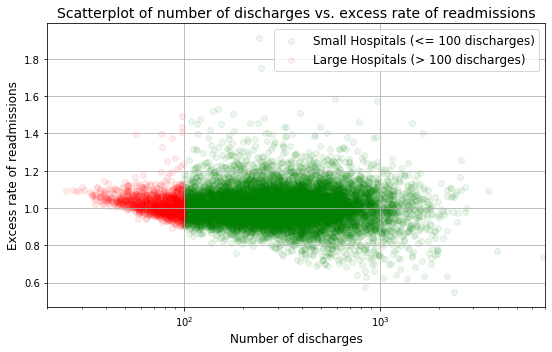

In [22]:
# New Plot

x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
_ = ax.scatter(x_large, y_large, alpha=0.08,color = 'green')
_ = ax.scatter(x_small, y_small, alpha=0.08,color = 'red')


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges', fontsize=12)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=12)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
_ = ax.legend(['Small Hospitals (<= 100 discharges)', 'Large Hospitals (> 100 discharges)'], fontsize=12)

ax.grid(True)
fig.tight_layout()